#  Homework 5

## APMTH 207: Stochastic Methods for Data Analysis, Inference and Optimization

**Due Date: ** Thursday, March 2nd, 2017 at 11:59pm

**Instructions:**

- Upload your final answers as well as your iPython notebook containing all work to Canvas.

- Structure your notebook and your work to maximize readability.

## Problem 1: Monte Carlo and Simulation Revisited
In Homework #2, we used simulation to compute the expected values of functions of random variables. That is, given a random variable $X$, defined over $\mathbb{R}$, distributed according to the pdf $f_X$, and given a real-valued function of $X$, $h(X)$, we approximated $\mathbb{E}[h(X)]$ as follows
$$
\mathbb{E}[h(X)] = \int_{\mathbb{R}} h(x)f_X(x) dx \approx \frac{1}{N} \sum_{i=1}^N h(X_i), \quad X_i \sim f_X
$$

Now, suppose that, instead of being given the distribution $f_X$ and $h(X)$, you were simply asked to evaluate the following complex integral:
$$
I=\int_{0}^{\infty} \frac{x^4\, \sin\left(\sqrt{\ln{(x+1)}}\right)e^{-x}}{2+(x-4)^2} \, dx 
$$
A clever way to apply our Monte Carlo techniques would be to split the integrand as $h(x)f_X(x)$, and then approximate the integral as we have done in Homework #2:
$$
I = \int_{0}^{\infty} h(x)\,f_X(x) dx  \approx \frac{1}{N} \sum\limits_{i=1}^{N} h(X_i)$$ 
where the $X_i$'s are independently drawn from $f_X(x)$. 

We denote the approximation of the integral as follows
$$\hat{I} = \frac{1}{N} \sum\limits_{i=1}^{N} h(X_i), \quad X_i \sim f_X.$$


### Part A:

Rewrite your integrand as a product of two functions, $h(x)g(x)$, which can then be expressed as $h(x)f_X(x)$, where $f_X$ is a pdf (you may use one of the splits we propose in Part B or create your own). Explain why your choice of $h$ is appropriate. Explain why your choice of $g$ is appropriate for creating a pdf $f_X$.

(**Hint:** think about what you would have to do do turn $g$ into a good pdf and $h$ into a function that can be evaluated at multiple samples from this pdf. Think about how to choose these two functions to make your Monte Carlo approximation of $I$ as accurate as possible.)

In [1]:
import numpy as np
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt

In [151]:
g = lambda x: x*np.exp(-x)
h = lambda x:(np.power(x,3)*np.sin(np.sqrt(np.log(x+1))))/(2+np.power(x-4,2))

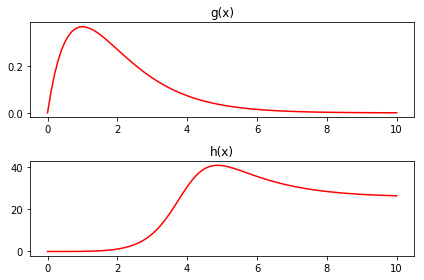

In [155]:
xx = np.linspace(0,10,100)

fig, axarr = plt.subplots(2)
                        

axarr[0].plot(xx,g(xx),'r')
axarr[0].set_title('g(x)')


axarr[1].plot(xx,h(xx),'r')
axarr[1].set_title('h(x)')
plt.tight_layout()
plt.show()

In [158]:
g = lambda x: 1.0/(2+np.power(x-4,2))
h = lambda x:(np.power(x,4)*np.sin(np.sqrt(np.log(x+1))))*np.exp(-x)

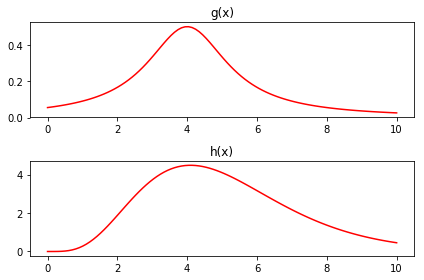

In [159]:
xx = np.linspace(0,10,100)

fig, axarr = plt.subplots(2)
                        

axarr[0].plot(xx,g(xx),'r')
axarr[0].set_title('g(x)')


axarr[1].plot(xx,h(xx),'r')
axarr[1].set_title('h(x)')
plt.tight_layout()
plt.show()

$h(x)=xe^{-x}$

$g(x)= \frac{x^3\, \sin\left(\sqrt{\ln{(x+1)}}\right)}{(2+(x-4)^2)} $

This seems better, since $g(x)$ is close to a gamma distribution whose sum is equal to 1, defined in [0, inf].

### Part B:

In [160]:
from scipy.stats import gamma

def metropolis_hastings(p,q, qdraw, nsamp, xinit):
    samples=np.empty(nsamp)
    x_prev = xinit
    accepted=0
    for i in xrange(nsamp):
        x_star = qdraw(x_prev)
        p_star = p(x_star)
        p_prev = p(x_prev)
        pdfratio = p_star/p_prev
        proposalratio = q(x_prev, x_star)/q(x_star, x_prev)
        if np.random.uniform() < min(1, pdfratio*proposalratio):
            samples[i] = x_star
            x_prev = x_star
            accepted +=1
        else:#we always get a sample
            samples[i]= x_prev
            
    return samples, accepted

t=10.0
def gammapdf(x_new, x_old):
    return gamma.pdf(x_new,x_old*t,scale=1/t)
def gammadraw(x_old):
    return gamma.rvs(x_old*t,scale=1/t)

- Use $\frac{1}{2+(x-4)^2}$ to create your pdf $f_X$. Implement a Metropolis algorithm to sample from $f_X$. Run the simulation 50 times for 150,000 points. Report the value of $\hat{I}$ and that of Var[${\hat{I}}$].

In [161]:
g = lambda x: 1.0/(2+np.power(x-4,2))
h = lambda x: (np.power(x,4)*np.sin(np.sqrt(np.log(x+1))))*np.exp(-x)

In [145]:
x0=np.random.uniform()
samps,acc = metropolis_hastings(g, gammapdf, gammadraw, 150000, x0)

150000


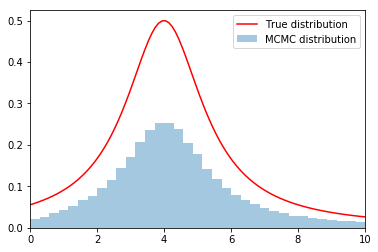

('starting point was ', 0.8823525771508661)


In [146]:
# plot our sample histogram
plt.hist(samps,bins=300, alpha=0.4, label=u'MCMC distribution', normed=True) 
xx= np.linspace(0,10,100)
plt.plot(xx, g(xx), 'r', label=u'True distribution') 
plt.legend()
plt.xlim([0,10])
plt.show()
print("starting point was ", x0)

- Use $xe^{-x}$ to create your pdf $f_X$. Implement a Metropolis algorithm to sample from $f_X$. Run the simulation 50 times for 150,000 points. Report the value of $\hat{I}$ and that of Var[${\hat{I}}$].

In [147]:
g2 = lambda x: x*np.exp(-x)
h2 = lambda x:0 if x<0 else (np.power(x,3)*np.sin(np.sqrt(np.log(x+1))))/(2+np.power(x-4,2))

In [148]:
x0=np.random.uniform()
samps,acc = metropolis_hastings(g2, gammapdf, gammadraw, 150000, x0)

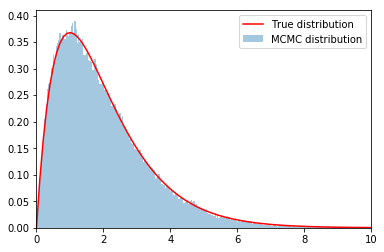

('starting point was ', 0.09840177355219015)


In [149]:
# plot our sample histogram
plt.hist(samps,bins=300, alpha=0.4, label=u'MCMC distribution', normed=True) 
xx= np.linspace(0,10,100)
plt.plot(xx, g2(xx), 'r', label=u'True distribution') 
plt.legend()
plt.xlim([0,10])
plt.show()
print("starting point was ", x0)

- Compare the variance of your two estimates. Which choice of $f_X$ is better? Explain why.

The second one looks good. the sum is close to 1, which means $f_X$ is a probability distribution.

## Problem 2: Metropolis Algorithm

Suppose we ask you to memorize the order of the top five movies on IMDB. When we quiz you on the order afterwards, you might not recall the correct order, but the mistakes you will tend to make in your recall can be modeled by simple probabilistic models.
  
Let's say that the top five movies are:  
1. *The Shawshank Redemption*
2. *The Godfather*
3. *The Godfather: Part II*
4. *The Dark Knight*
5. *Pulp Fiction*

Let's represent this ordering by the vector $\omega = (1,2,3,4,5)$. 

If you were to mistakenly recall the top five movies as:
2. *The Godfather*
3. *The Godfather: Part II*
5. *Pulp Fiction*
4. *The Dark Knight*
1. *The Shawshank Redemption*

We'd represent your answer by the vector $\theta = (2,3,5,4,1)$.

Now, we have a way of quantifying how wrong your answer can be. We define the Hamming distance between two top five rankings, $\theta, \omega$, as follows:
$$d(\theta, \omega) = \sum_{i=1}^5 \mathbb{I}_{\theta_i\neq \omega_i},$$ 
where $\mathbb{I}_{\theta_i\neq \omega_i}$ is the indicator function that returns 1 if $\theta_i\neq \omega_i$, and 0 otherwise.

For example, the Hamming distance between your answer and the correct answer is $d(\theta, \omega)=4$, because you only ranked *The Dark Knight* is correctly. 

Finally, let's suppose that the probability of giving a particular answer (expressed as $\theta$) is modeled as
$$ p(\theta \,|\, \omega, \lambda) \propto  e^{-\lambda\, d(\theta,\, \omega)}.$$

### Part A:

Implement an Metropolis algorithm to produce sample guesses from 500 individuals, with various $\lambda$ values, $\lambda=0.2, 0.5, 1.0$. What are the top five possible guesses?

### Part B:
Compute the probability that *The Shawshank Redemption* is ranked as the top movie (ranked number 1) by the Metropolis algorithm sampler. Compare the resulting probabilities for the various different $\lambda$ values. Summarize your findings.